
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5

# Load Data to Spark Cluster

In [9]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [10]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [11]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [12]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



First few Rows from hive table

In [13]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 7")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43|58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012|66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [14]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)


Total number of records in the dataset: 506


In [15]:
# Task 2: Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
medv_stats = spark.sql("SELECT AVG(medv) AS mean_medv,STDDEV(medv) AS std_dev_medv, MIN(medv) AS min_medv,MAX(medv) AS max_medv FROM bostonh.bos_housing")
medv_stats.show()


+------------------+-----------------+--------+--------+
|         mean_medv|     std_dev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+



In [16]:
#Task 2: Calculate and display the mean "rm" (average number of rooms per dwelling).
print("Average number of rooms per dwelling \n")
spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing").show()


Average number of rooms per dwelling 

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [17]:
# Task 3: Data Exploration

# Identify the property with the highest crime rate ("crim")
print("The property with the highest crime rate \n")
property_with_highest_crime = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    WHERE crim = (SELECT MAX(crim) FROM bostonh.bos_housing)
""")
property_with_highest_crime.show()

The property with the highest crime rate 

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [18]:
# Task 3 Find and report the property with the lowest median home value ("medv")

print("The property with the lowest median value  \n")
property_with_lowest_median_home_value = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    WHERE medv = (SELECT Min(medv) FROM bostonh.bos_housing)
""")
property_with_lowest_median_home_value.show()

The property with the lowest median value  

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



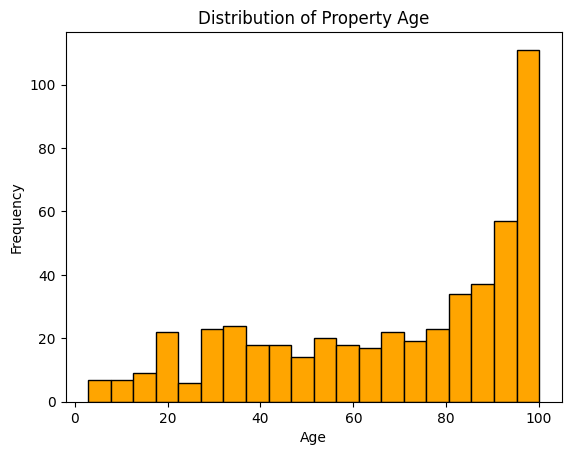

In [ ]:
# Task 4: Data Distribution Analysis

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import pandas as pd

# Create a histogram showing the distribution of the "age" column
age_distribution = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()
plt.hist(age_distribution, bins=20, color='orange',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Property Age')
plt.show()

In [19]:
#Task 4: Calculate and report the percentage of properties with a "chas" value of 1
total_properties = spark.sql("SELECT COUNT(*) AS total_properties FROM bostonh.bos_housing").collect()[0]["total_properties"]
chas_properties = spark.sql("SELECT COUNT(*) AS chas_properties FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["chas_properties"]
percentage_chas_properties = (chas_properties / total_properties) * 100
print(f"Percentage of properties with a 'chas' value of 1: {percentage_chas_properties:.2f}%")

Percentage of properties with a 'chas' value of 1: 6.92%


In [20]:
# Task 5: Correlation Analysis

# Calculate the correlation coefficient between "rm" and "medv"
correlation_rm_medv = spark.sql("SELECT corr(rm, medv) AS correlation_rm_medv FROM bostonh.bos_housing").collect()[0]["correlation_rm_medv"]
print(f"Correlation coefficient between 'rm' and 'medv': {correlation_rm_medv:.2f}")


Correlation coefficient between 'rm' and 'medv': 0.70


In [25]:
# task 5: Investigate the correlation between "ptratio" and "nox"
correlation_ptratio_nox = spark.sql("SELECT corr(ptratio, nox) AS correlation_ptratio_nox FROM bostonh.bos_housing").collect()[0]["correlation_ptratio_nox"]
print(f"Correlation coefficient between 'ptratio' and 'nox': {correlation_ptratio_nox:.2f}")

Correlation coefficient between 'ptratio' and 'nox': 0.19


In [27]:
# Task 6: Identify and display the top 5 neighborhoods with the highest median home values ("medv")
print("the top 5 neighborhoods with the highest median home values \n")
top_neighborhoods = spark.sql("""
    SELECT *
    FROM bostonh.bos_housing
    ORDER BY medv DESC
    LIMIT 5
""")
top_neighborhoods.show()

the top 5 neighborhoods with the highest median home values 

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [29]:
#Task 6:  Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0
print("The average property age for neighborhoods with a ""chas"" value of 1 compared to those with ""chas"" value of 0 \n")
average_age_by_chas = spark.sql("""
    SELECT chas,
        AVG(CASE WHEN chas = 1 THEN age ELSE NULL END) AS avg_age_chas_1,
        AVG(CASE WHEN chas = 0 THEN age ELSE NULL END) AS avg_age_chas_0
    FROM bostonh.bos_housing
    WHERE chas IN (0, 1)
    GROUP BY chas
""")
average_age_by_chas.show()

The average property age for neighborhoods with a chas value of 1 compared to those with chas value of 0 

+----+-----------------+-----------------+
|chas|   avg_age_chas_1|   avg_age_chas_0|
+----+-----------------+-----------------+
|   1|77.50000000000001|             null|
|   0|             null|67.91167728237794|
+----+-----------------+-----------------+



In [ ]:
# Task 7  Create a Hive view named "property_age_view"
property_age_view = spark.sql("""CREATE OR REPLACE VIEW property_age_view AS
SELECT age, medv
FROM bostonh.bos_housing""")
property_age_view.show()

++
||
++
++



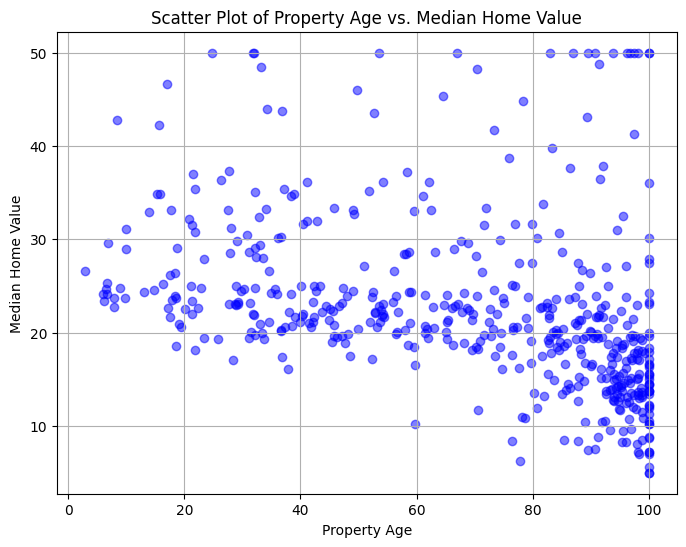

In [ ]:

#Task 7: Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import pandas as pd

# Query the Hive view and retrieve the data
scatter_data = spark.sql("SELECT age, medv FROM property_age_view").toPandas()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data['age'], scatter_data['medv'], c='b', alpha=0.5)
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()


**The significance of detecting outliers in data analysis lies in its ability to:**

Enhance Data Quality: Outliers can indicate data quality issues, errors, or unusual instances that need further investigation or cleaning. Identifying and addressing outliers can improve the overall quality of the dataset.

Impact on Analysis: Outliers can significantly skew statistical analyses, leading to incorrect conclusions. Detecting and handling outliers can help ensure that data analysis results are more accurate and reliable.

Insights and Patterns: Outliers can sometimes reveal important insights and patterns in the data. They might represent unique cases or areas of interest, making them valuable for specialized analysis.

Robust Models: Outliers can negatively impact machine learning models. Addressing them can lead to more robust and effective predictive models, as these models might be overly influenced by outliers.

Data Interpretation: In some cases, outliers may represent real and meaningful data points. Detecting them allows for a more nuanced and accurate interpretation of the data.


In [30]:

# task 8: Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
print("properties with a ""crim"" value greater than 10 \n")
crime_value_greater = spark.sql("""SELECT *
FROM bostonh.bos_housing
WHERE crim > 10""")

crime_value_greater.show()

properties with a crim value greater than 10 

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671

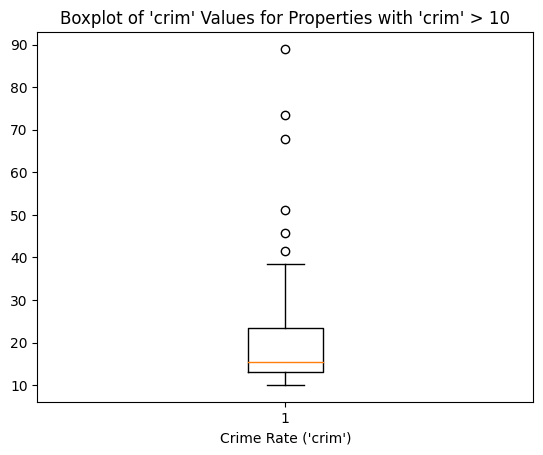

In [34]:
import matplotlib.pyplot as plt


# Extract the "crim" values from the DataFrame
crime = crime_value_greater = spark.sql("""SELECT crim
FROM bostonh.bos_housing WHERE crim > 10""").toPandas()


# Create a boxplot
plt.boxplot(crime, vert=True)
plt.title("Boxplot of 'crim' Values for Properties with 'crim' > 10")
plt.xlabel("Crime Rate ('crim')")
plt.show()


In [48]:
# Task 9: Hypothesis test for the relationship between "rm" and "medv"
from scipy import stats


# Null Hypothesis (H0): There is no statistically significant relationship between "rm" and "medv."
# Alternative Hypothesis (H1): There is a statistically significant relationship between "rm" and "medv."


#a DataFrame named 'df' with columns 'rm' and 'medv'
df=spark.sql("""SELECT rm,medv
FROM bostonh.bos_housing""")
# Extract 'rm' and 'medv' as arrays
rm_values = df.select("rm").rdd.flatMap(lambda x: x).collect()
medv_values = df.select("medv").rdd.flatMap(lambda x: x).collect()

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(rm_values, medv_values)

# Output the results
print("t_statistic:", t_statistic, "p_value:", p_value)

if p_value < 0.05:
    print("The relationship between rm and medv is statistically significant")
else:
    print("The relationship between rm and medv is not statistically significant")



t_statistic: -39.62461149680032 p_value: 6.49016750007408e-208
The relationship between rm and medv is statistically significant


The results support the alternative hypothesis that there is a statistically significant relationship between the average number of rooms ("rm") and the median home value ("medv"). The negative t-statistic indicates a difference in means, and the very small p-value indicates strong evidence in favor of this relationship.